In [1]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

In [2]:
data = pd.read_csv("CAH-201803-train.csv")

In [3]:
test = pd.read_csv("CAH-201803-test.csv")

In [4]:
data.head()

,id_num,Q1,Q2,political_affiliation,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,1,Male,53,Independent,Liberal,College degree,Black,No,No,No,"Yes, somewhat religious",Pro-Choice,No,No,Behave no differently,5,2,5,No
1,5,Female,66,Independent,Conservative,Some college,White,Yes,No,Yes,"Yes, very religious",Pro-life,Yes,Yes,Less Willing,4,5,4,No
2,7,Female,58,Democrat,Liberal,College degree,White,No,No,No,"Yes, very religious",Pro-Choice,No,No,Behave no differently,5,1,4,Yes
3,8,Male,55,Independent,Moderate,High school or less,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-life,Yes,Yes,Less Willing,4,5,4,Yes
4,9,Male,64,Republican,Conservative,High school or less,White,Yes,Yes,Yes,No,Pro-life,No,No,Behave no differently,5,1,1,Yes


In [5]:
data = data.dropna()

In [6]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


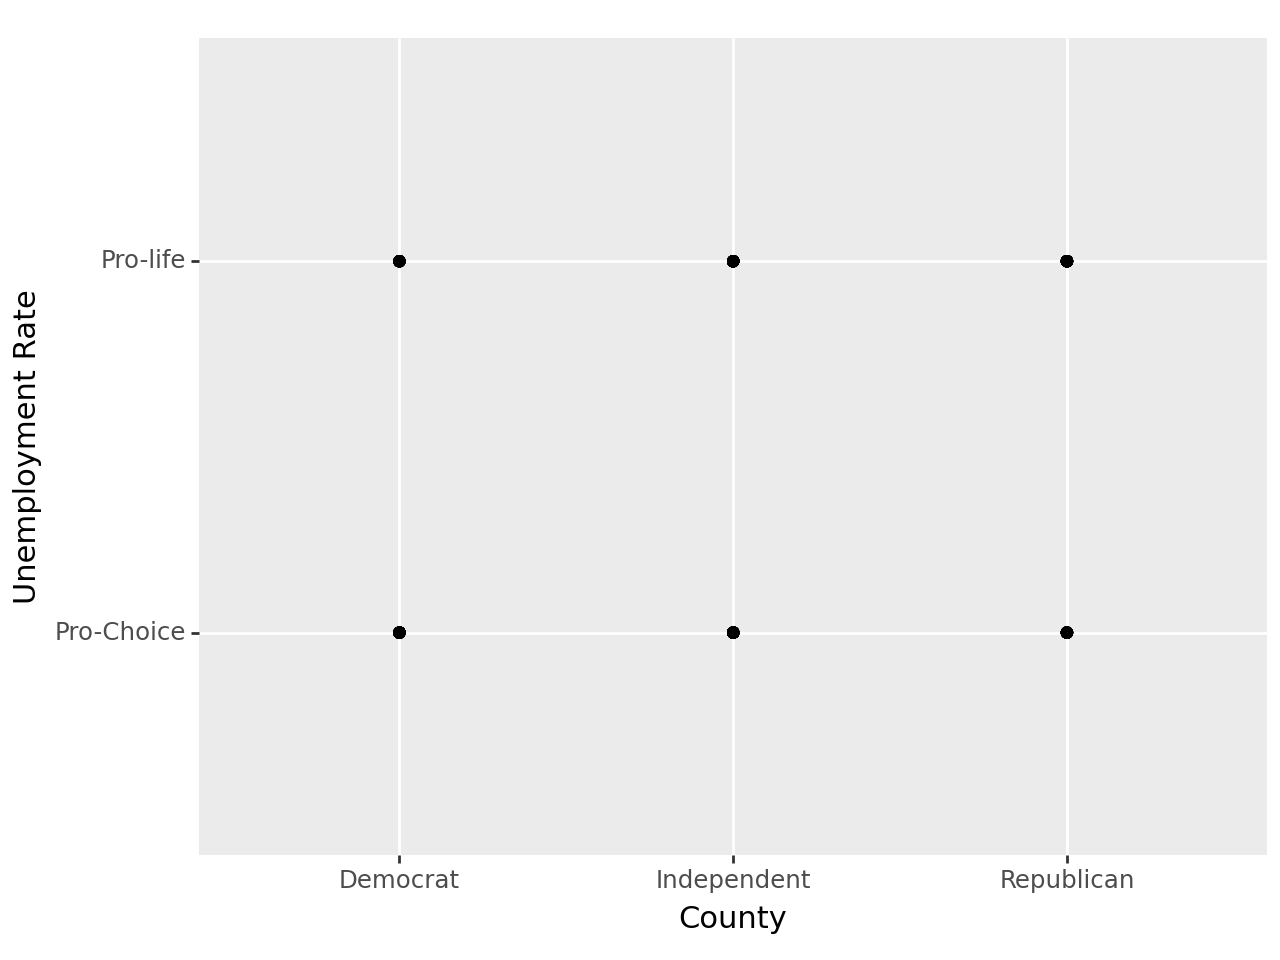

<Figure Size: (640 x 480)>

In [7]:
from plotnine import *
(ggplot(data, aes(x = 'political_affiliation', y = "Q11"))
+ geom_point()
+ labs(x = 'County', y = 'Unemployment Rate'))

In [8]:
data.head()

,id_num,Q1,Q2,political_affiliation,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,1,Male,53,Independent,Liberal,College degree,Black,No,No,No,"Yes, somewhat religious",Pro-Choice,No,No,Behave no differently,5,2,5,No
1,5,Female,66,Independent,Conservative,Some college,White,Yes,No,Yes,"Yes, very religious",Pro-life,Yes,Yes,Less Willing,4,5,4,No
2,7,Female,58,Democrat,Liberal,College degree,White,No,No,No,"Yes, very religious",Pro-Choice,No,No,Behave no differently,5,1,4,Yes
3,8,Male,55,Independent,Moderate,High school or less,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-life,Yes,Yes,Less Willing,4,5,4,Yes
4,9,Male,64,Republican,Conservative,High school or less,White,Yes,Yes,Yes,No,Pro-life,No,No,Behave no differently,5,1,1,Yes


Q4, Q6, Q10 - .6459

In [11]:
X = data.drop(['political_affiliation'], axis = 1)
y = data['political_affiliation']

In [14]:
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
    ('dummify_q4', enc, ['Q4','Q6']),
    ("standardize", StandardScaler(), ["Q2"])
], remainder = 'drop').set_output(transform = 'pandas')


In [15]:
log = Pipeline(
    [('dummify_everything', ct),('log', LogisticRegression())]
)
cv1 = cross_val_score(log, X,y, cv=10, scoring = "accuracy")
cv1.mean()

0.6216911764705884

In [12]:
logfit = log.fit(X,y)
preds = logfit.predict(X)

In [76]:
final_predictions = pd.DataFrame(
    {"id_num": test['id_num'],
    "political_affiliation_predicted": logfit.predict(test)}
)

In [78]:
final_predictions = final_predictions.reset_index(drop=True)

In [79]:
final_predictions

,id_num,political_affiliation_predicted
0,2,Republican
1,3,Democrat
2,4,Independent
3,6,Independent
4,11,Independent
...,...,...
161,327,Independent
162,330,Independent
163,331,Republican
164,333,Independent


In [80]:
final_predictions.to_csv('Classification_exam_1.csv')

In [13]:
Knn1 = Pipeline(
    [('dummify_everything', ct),('KNN', KNeighborsClassifier())]
)
neigh = {'KNN__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv1 = GridSearchCV(Knn1, neigh, cv = 5, scoring='accuracy')
gscv1fit = gscv1.fit(X,y)
Knn1 = Pipeline(
    [('dummify_everything', ct),('KNN', KNeighborsClassifier(gscv1fit.best_params_.get('KNN__n_neighbors')))]
)
cv2 = cross_val_score(Knn1, X,y, cv=10, scoring = "accuracy")
cv2.mean()

0.6040441176470588

In [14]:
DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier())]
)
neigh = {'DT1__max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'DT1__min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv2 = GridSearchCV(DT1, neigh, cv = 5, scoring='accuracy')
gscv2fit = gscv2.fit(X,y)

DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier(max_depth = gscv2fit.best_params_.get('DT1__max_depth'), min_samples_split = gscv2fit.best_params_.get("DT1__min_samples_split")))]
)
cv4 = cross_val_score(DT1, X,y, cv=10, scoring = "accuracy")
cv4.mean()

0.6341911764705882

In [121]:
gscv2fit.best_params_

{'DT1__max_depth': 5, 'DT1__min_samples_split': 4}

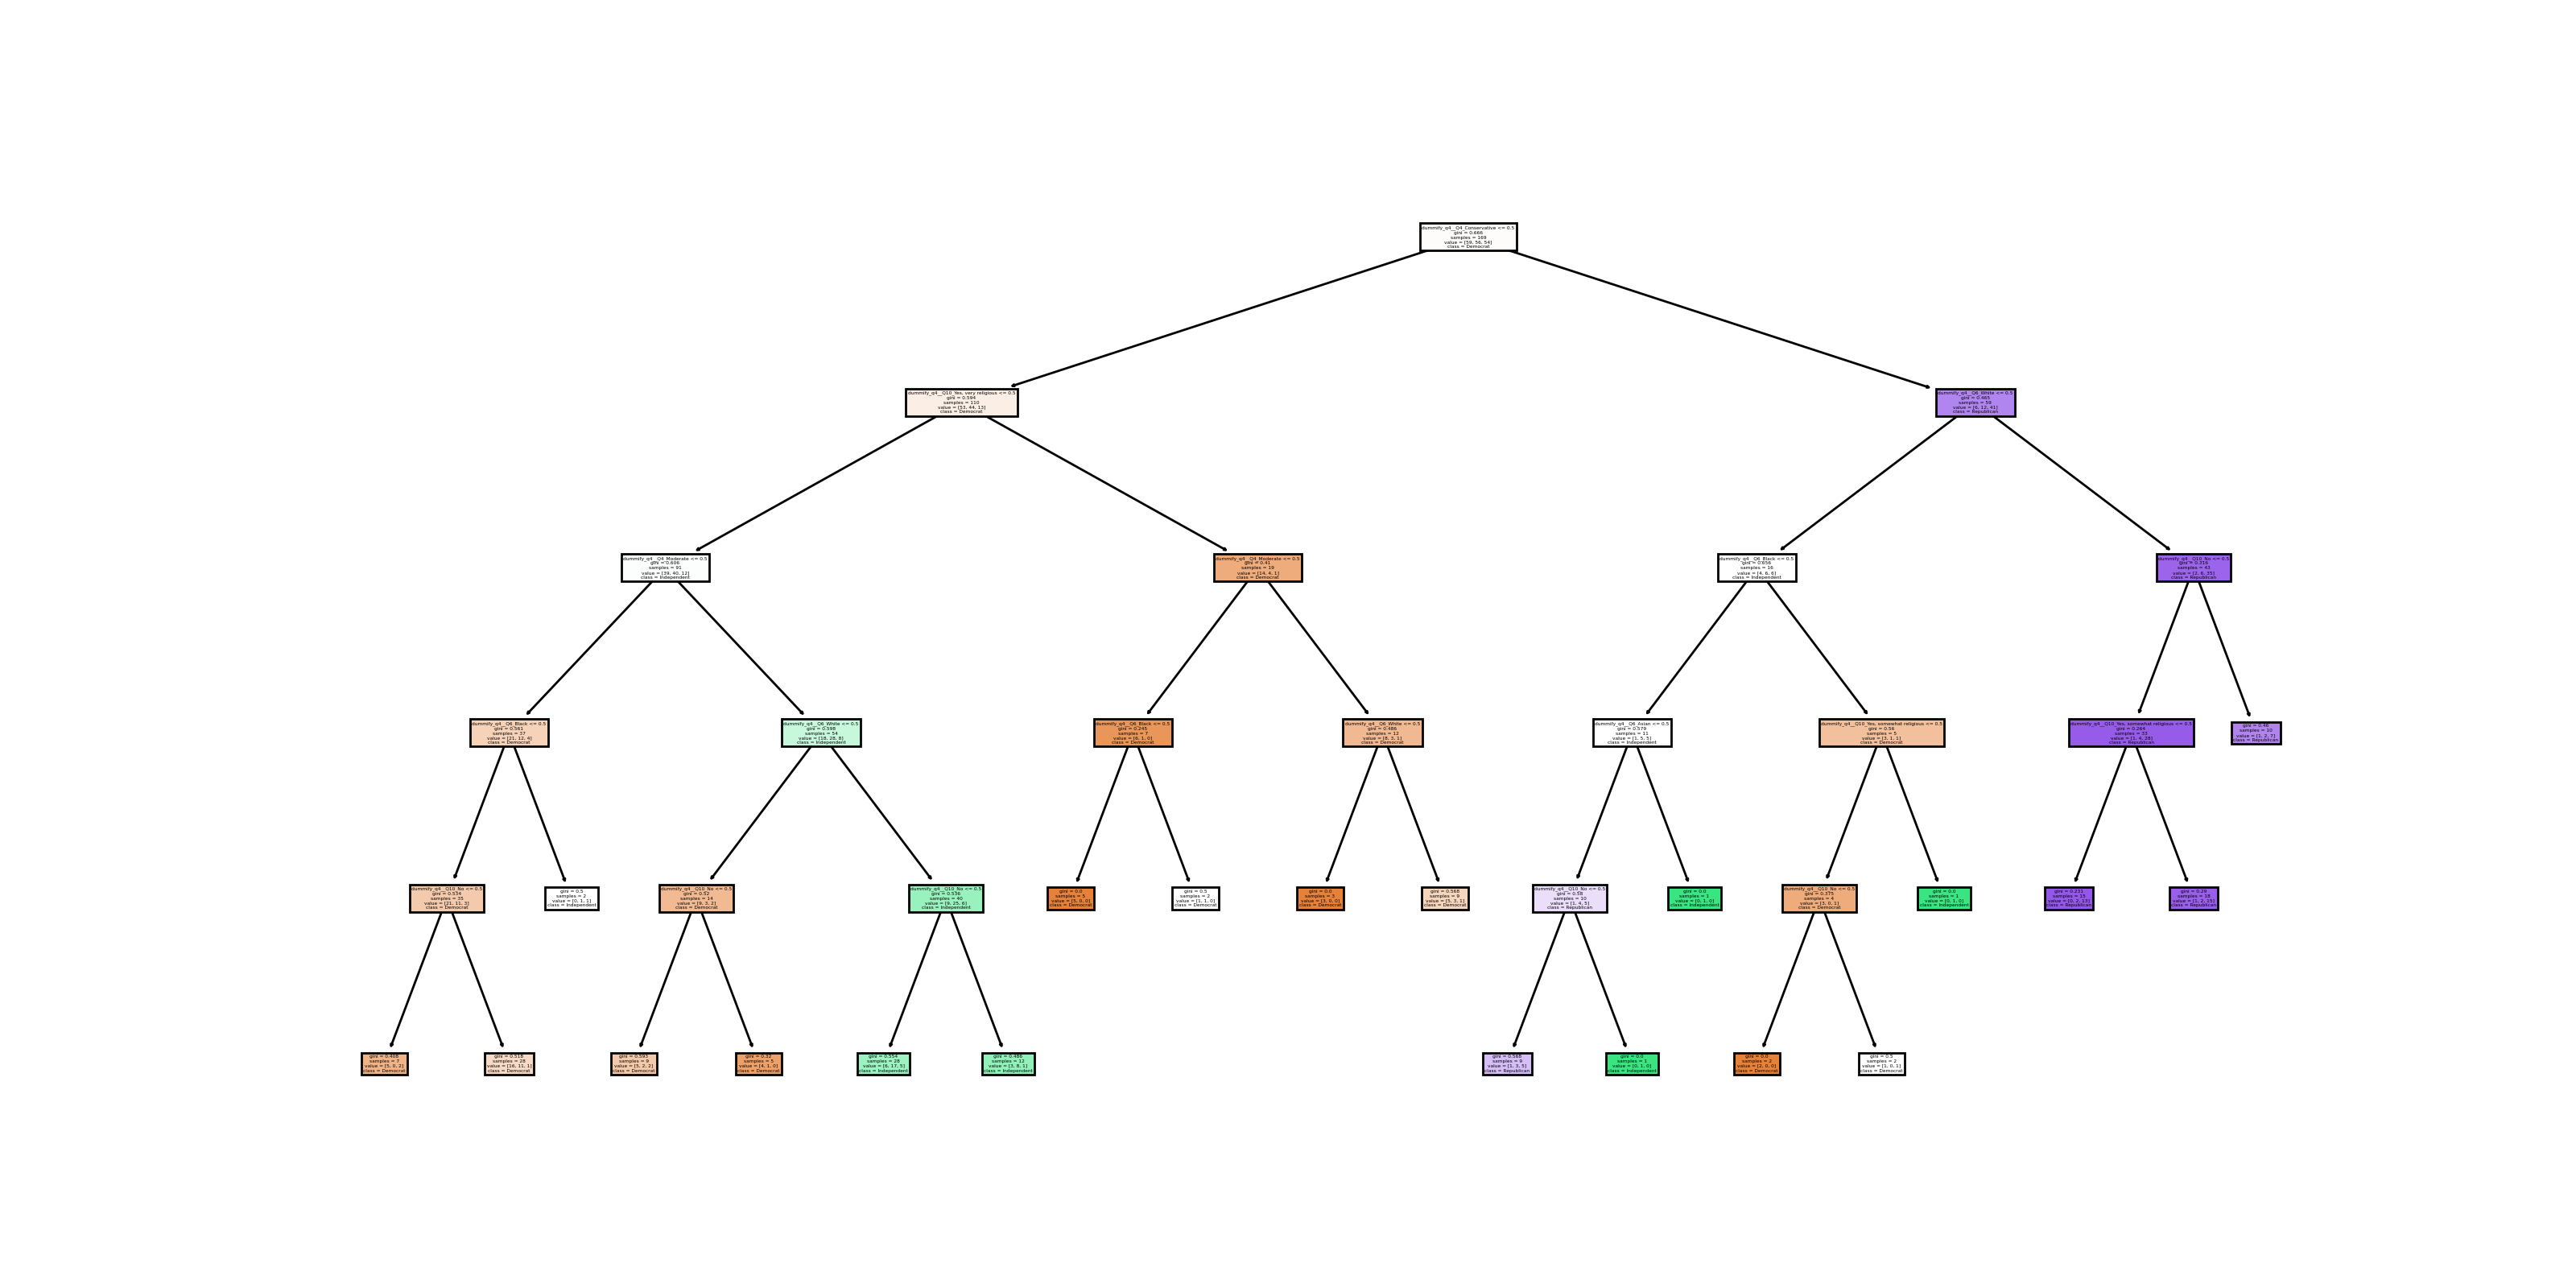

In [122]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'clf' is your trained decision tree classifier
plt.figure(figsize=(16, 8))  # Set the figure size
plot_tree(DT1.fit(X, y).named_steps['DT1'], feature_names=ct.fit_transform(X).columns.tolist(), class_names=['Democrat', 'Independent','Republican'], filled=True)
plt.show()